# Introduction to Anaconda

<b>Anaconda</b> (or Conda) is a very useful tool for using Python.
It allows you to create virtual environments containing sandboxed Python installations.
This way, you don't need to wipe out and reinstall Python if you make a mistake with your environment.
In addition, Conda environments allow multiple Python installations to exist simultaneously, and in each of them you can have different Python versions or different libraries/packages, without affecting the other environments.

---
## Installing Anaconda

<div class="alert alert-block alert-info">
<b>Note:</b> You don't need to install python separately. It comes pre-installed with Anaconda.
</div>

<b>Step 1</b> To install Anaconda, follow the appropriate guide:

- Windows: https://docs.anaconda.com/anaconda/install/windows/ or [video guide Greek](https://www.youtube.com/watch?v=eGVqBAtRqJ8) | [video guide English](https://www.youtube.com/watch?v=BGTor-HJvKA)
- Linux: https://docs.anaconda.com/anaconda/install/linux/
- macOS: https://docs.anaconda.com/anaconda/install/mac-os/

Verify that your installation was successful:
- Windows: Open the **Anaconda Prompt** (just type it in the Windows search bar). It should open a shell similar the Command Prompt, but displaying **(base)**.

- Linux and macOS: Open the terminal, now it should display **(base)** before the local path.

You can check the version of your **base** Python environment by using the command `python --version`.

You can also verify that python is installed by using `python`

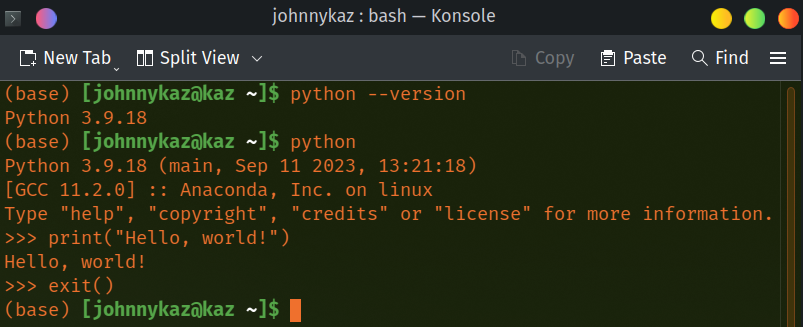

---
## Setting up your Conda environment

After you have installed **Anaconda**, you can create (and modify) as many environments as you want.

Now, we will see how you can set up an environment using Anaconda.

---
### 1. Installing an environment from a file

For the purpose of this course, we will (most likely) use one specific environment, that will not change (much) throughout the course. To that extent, we provide you with the file `environment.yml` containing the specifications for all the necessary packages. You can run one of the commands below to install the environment.

<div class="alert alert-block alert-danger">
<b>WARNING:</b> If you use these commands, Pytorch will be installed <b>without the ability to run on GPU</b>. It will still work, but it may be slower. If you are using Windows or Linux, have a (Nvidia or AMD) GPU and you want to utilize it, just follow the instruction in the manual setup. Unfortunately, GPU usage is not available on MacOS.
</div>

If you want to name your environment `cs587`, you can simply run:

`conda env create -f environment.yml`
<br></br>
Alternatively, you can use any other name for your environment, by running:

`conda env create --name <environment_name> --file environment.yml`

---
### 2. Manual environment setup from the terminal
In order to create an environment with all the necessary packages, you can run the following commands in order:

Create a new environment named 'cs587' (or however you want to name it) with `Python 3.12`.

`conda create --name cs587 python=3.12`

Switch to your environment

`conda activate cs587`
<div class="alert alert-block alert-info">
<b>IMPORTANT:</b> You have to use this command every time you start Anaconda. Otherwise, the default environment will be 'base'. Of course you can work on 'base', but I would advise against it. It is a "special" environment that you cannot wipe out like the others, unless you uninstall Anaconda.
</div>

Install some useful packages:

`conda install 'numpy<2' pandas matplotlib scikit-learn scikit-image tqdm pillow tensorboard`

Install Pytorch. If you just want regular installation which **runs only on CPU**, you can use:

`conda install pytorch torchvision torchaudio cpuonly -c pytorch`

Otherwise, you can generate the command for a custom installation at the following link https://pytorch.org/.<br></br>
In the option *Compute Platform* choose a version of `CUDA` if you have a NVIDIA GPU, or `ROCm` if your GPU is made by AMD.

<div class="alert alert-block alert-info">
<b>NOTE:</b> In the latest version (v2.6.0, published on January 29, 2025), PyTorch stopped publishing Anaconda packages due to high maintenance costs and suggests other installation methods. However, we can download the previous version (v2.5.1, published on October 29, 2024) just fine using Anaconda, using the following link: <a href="https://pytorch.org/get-started/previous-versions/#conda">Installing Pytorch v2.5.1</a>.
</div>

---
## Jupyter and Python IDEs

In this tutorial (and likely also in the next ones) we will be using Jupyter notebooks to run Python code.
Jupyter notebooks have multiple advantages, like:
- They allow you to divide your code in separate cells and run those instead
- Cells can either contain Python code or Markdown, allowing you to combine code with nice comments, explanations and mathematical equations, like the following:
\begin{equation*}
e^{i\pi} + 1 = 0
\end{equation*}

### Installation
The easiest way to install Jupyter is by running on a conda environment (e.g. *'base'*) the command

`conda install jupyter`

(If you used the `environment.yml` file we provided, jupyter is already installed, you don't need to run the above command)

### Running jupyter
You can start a session in Jupyter by running the command

`jupyter-notebook`

This should open automatically in your browser. If that does not happen, you can check the output on the terminal, where you should see a line like

`Jupyter Notebook 6.4.12 is running at: http://localhost:8889/?token=****************************`

and copy the link on your browser.

If you are already using an IDE like PyCharm or VSCode to run Python code, you can use the Jupyter extension to open the notebooks:
- VSCode: [setup guide](https://saturncloud.io/blog/activating-anaconda-environment-in-vscode-a-guide-for-data-scientists/) | [Jupyter Extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter)
- PyCharm (only Professional edition): https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html 

---
## Verifying your installation
Now that you have set up Anaconda, the `cs587` environment, and Jupyter, you can check that everything is working fine. You may start by opening this Jupyter notebook and running the cell below. If it doesn't raise any error, then you are on a good track: it means that you have installed the most important packages. Congrats!

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import skimage
import torch
import torchvision
from PIL import Image
import tensorboard
import tqdm # this is not important actually, but you can use it to display the progress of long for loops

In [3]:
print(f'python: {sys.version}')
print(f'numpy: {np.__version__}')
print(f'matplotlib: {matplotlib.__version__}')
print(f'pandas: {pd.__version__}')
print(f'torch: {torch.__version__}')
print(f'tensorboard: {tensorboard.__version__}')

print('='*50)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'running on device: {device}')

if torch.cuda.is_available():
    print(f'cuda: {torch.version.cuda}')
    curr_device = torch.cuda.current_device()
    print(f'device_count: {torch.cuda.device_count()}')
    print(f'current_device: {curr_device}')
    print(f'device: {torch.cuda.device(curr_device)}')
    print(f'get_device_name: {torch.cuda.get_device_name(curr_device)}')

# run tensorboard
%load_ext tensorboard
%tensorboard --logdir test_logs

print('='*50)
print('All libraries are imported successfully')


python: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:56:27) [GCC 11.2.0]
numpy: 1.26.4
matplotlib: 3.10.0
pandas: 2.2.3
torch: 2.5.1
tensorboard: 2.17.0
running on device: cpu
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 22928), started 0:00:09 ago. (Use '!kill 22928' to kill it.)

All libraries are imported successfully


## Conda cheatsheet
Anaconda allows you to do a lot of things with your environments, like cloning them, deleting them, restoring them to a previous state.

You can find the complete list of commands at the following URL: 
[Conda Cheatsheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)